# Grand Model
    - This notbook show results of testing SVM multi-classifier on 18 different
       type of CVEs with hyperparamter search 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

# Read Data

In [3]:
X_train, X_val, y_train, y_val =read_data("../DataFiles/gcn_embeddings/embeddings_all.csv", drop_1st_col=True)

{'CWE121': 4803, 'CWE122': 6550, 'CWE124': 2229, 'CWE126': 1498, 'CWE127': 2223, 'CWE134': 3144, 'CWE190': 4325, 'CWE191': 3185, 'CWE194': 1232, 'CWE195': 1262, 'CWE23': 2653, 'CWE36': 2627, 'CWE401': 1814, 'CWE457': 739, 'CWE590': 2875, 'CWE690': 1062, 'CWE762': 4115, 'CWE78': 5351}


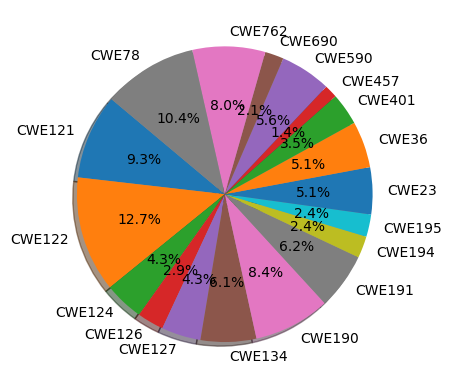

In [6]:
show_proportions(y_train)
import matplotlib.pyplot as plt
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# Initial Fit

## SVM


In [7]:
%%time
clf = svm.SVC( kernel='rbf')
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 79.57126550196374%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1137
      CWE122       0.79      0.87      0.83      1631
      CWE124       0.60      0.47      0.53       559
      CWE126       0.78      0.57      0.66       451
      CWE127       0.55      0.56      0.56       555
      CWE134       0.96      0.98      0.97       801
      CWE190       0.53      0.97      0.68      1005
      CWE191       0.76      0.07      0.12       828
      CWE194       0.91      0.47      0.62       360
      CWE195       0.63      0.93      0.75       330
       CWE23       0.65      0.80      0.72       660
       CWE36       0.75      0.57      0.65       687
      CWE401       0.75      0.85      0.80       447
      CWE457       0.97      0.77      0.86       175
      CWE590       0.83      0.75      0.79       713
      CWE690       0.96      0.97      0.96       264
      CWE762       0.95      0.97      0.9

## Hyper parameter Search

In [8]:
from scipy.stats import loguniform
import numpy as np
c_range =loguniform(1e-5, 1e5)
gamma_range = np.linspace(0.0001, 1)
param_grid = {'C': c_range,
              'gamma': gamma_range,
             }

In [10]:
clf2 = svm.SVC( kernel='rbf')

parameter_search(X_train, y_train, clf2, param_grid)

Best parameters:  {'C': 31624.112064950903, 'gamma': 0.4082224489795918}
Best cross-validation score:  0.8866060126980573


SVC(C=31624.112064950903, gamma=0.4082224489795918)

In [5]:
clf = svm.SVC( kernel='rbf', C=31624.112, gamma= 0.4082, probability=True)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 94.16294232592335%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1137
      CWE122       0.98      0.99      0.98      1631
      CWE124       0.83      0.84      0.84       559
      CWE126       0.88      0.82      0.85       451
      CWE127       0.76      0.76      0.76       555
      CWE134       1.00      1.00      1.00       801
      CWE190       0.70      0.77      0.73      1005
      CWE191       0.69      0.62      0.65       828
      CWE194       0.92      0.94      0.93       360
      CWE195       0.93      0.91      0.92       330
       CWE23       0.63      0.64      0.64       660
       CWE36       0.65      0.64      0.64       687
      CWE401       0.99      0.99      0.99       447
      CWE457       1.00      0.95      0.98       175
      CWE590       0.98      0.98      0.98       713
      CWE690       1.00      1.00      1.00       264
      CWE762       1.00      1.00      1.0